In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
(X_train,y_train),(_,_) = tf.keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
28*28

784

In [6]:
y_train.shape

(60000,)

5


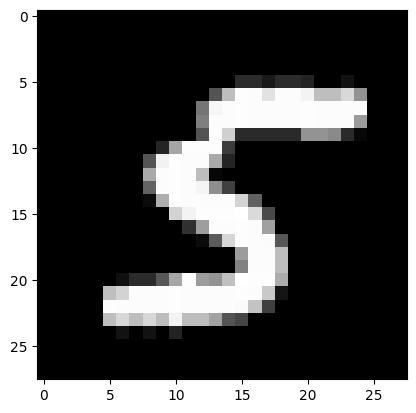

In [9]:
i = np.random.randint(0,60000)
print(y_train[i])
plt.imshow(X_train[i],cmap='gray')

In [10]:
X_train  = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
X_train = X_train / 255

In [14]:
buffer_size = 60000
batch_size = 256

In [15]:
type(X_train)

numpy.ndarray

In [16]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)


In [17]:
type(X_train)

tensorflow.python.data.ops.dataset_ops.BatchDataset

# Building Generator

In [26]:
def build_generator():
  network = tf.keras.Sequential()

  network.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100, )))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Reshape((7, 7, 256)))

  # 7x7x128
  network.add(layers.Conv2DTranspose(128, (5,5), padding='same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 14x14x64
  network.add(layers.Conv2DTranspose(64, (5,5), strides = (2,2), padding='same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 28x28x1
  network.add(layers.Conv2DTranspose(1, (5,5), strides = (2,2), padding='same', use_bias=False, activation='tanh'))

  network.summary()

  return network


In [27]:
generator = build_generator()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12544)             1254400   
                                                                 
 batch_normalization_3 (Batc  (None, 12544)            50176     
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 7, 7, 128)        819200    
 ranspose)                                                       
                                                                 
 batch_normalization_4 (Batc  (None, 7, 7, 128)       

In [28]:
noise = tf.random.normal([1,100])

In [29]:
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0.1276842 , -0.92843086,  0.7068958 ,  0.6928392 , -0.49893266,
        -0.43944886, -0.45375064, -1.4904284 , -0.8774441 , -2.302119  ,
         0.39786798,  0.13646011, -0.7434693 , -1.764268  , -0.5010138 ,
        -0.2383443 ,  2.303178  ,  0.35896784, -1.9031479 , -0.40293384,
        -1.0588723 ,  0.4322138 ,  0.18936369,  0.27167234,  1.0197526 ,
         0.37551066, -0.62907666, -0.04349595, -0.41363356, -0.09786039,
        -1.0113509 , -0.13889834,  0.45832   ,  1.1312413 , -1.1350901 ,
        -0.56744796, -0.72148013,  0.13061032,  1.1096125 , -1.4494966 ,
         0.16645505,  0.28686264,  0.2910391 ,  0.12297451, -1.5298101 ,
        -0.4865862 ,  1.317148  ,  1.5549259 ,  1.3507186 ,  0.07626547,
         0.15983883,  0.26446173, -0.10542454, -0.4975211 ,  0.3700638 ,
         0.8043823 ,  0.306033  ,  0.708233  ,  0.59753853,  0.78960884,
         0.53610647,  1.163122  ,  0.865881  ,  1.4275469 ,  1.7003895 ,
 

In [38]:
generated_image = generator(noise,training=False)

In [39]:
generated_image.shape

TensorShape([1, 28, 28, 1])

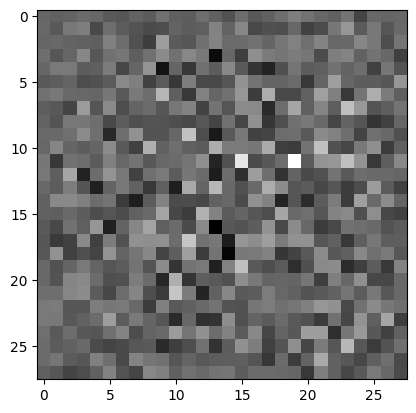

In [40]:
plt.imshow(generated_image[0,:,:,0],cmap='gray')

# Build Discriminator

In [41]:
def build_discriminator():
  network = tf.keras.Sequential()

  # 14x14x64
  network.add(layers.Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=[28,28,1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  # 7x7x128
  network.add(layers.Conv2D(128, (5,5), strides=(2,2), padding='same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Flatten())
  network.add(layers.Dense(1))

  network.summary()

  return network

In [42]:
discriminator = build_discriminator()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)             

In [43]:
discriminator(generated_image, training=False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.0024764]], dtype=float32)>

In [44]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(expected_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [45]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [46]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [47]:
epochs = 100
noise_dim = 100
num_images_to_generate = 16

In [48]:
@tf.function
def train_steps(images):
  noise = tf.random.normal([batch_size, noise_dim])
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training = True)

    expected_output = discriminator(images, training = True)
    fake_output = discriminator(generated_images, training = True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(expected_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [49]:
test_images = tf.random.normal([num_images_to_generate, noise_dim])

In [50]:
def train(dataset, epochs, test_images):
  for epoch in range(epochs):
    for image_batch in dataset:
      #print(image_batch.shape)
      train_steps(image_batch)

    print('Epoch: ', epoch + 1)
    generated_images = generator(test_images, training = False)
    fig = plt.figure(figsize=(10,10))
    for i in range(generated_images.shape[0]):
      plt.subplot(4,4,i+1)
      plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
    plt.show()

Epoch:  1


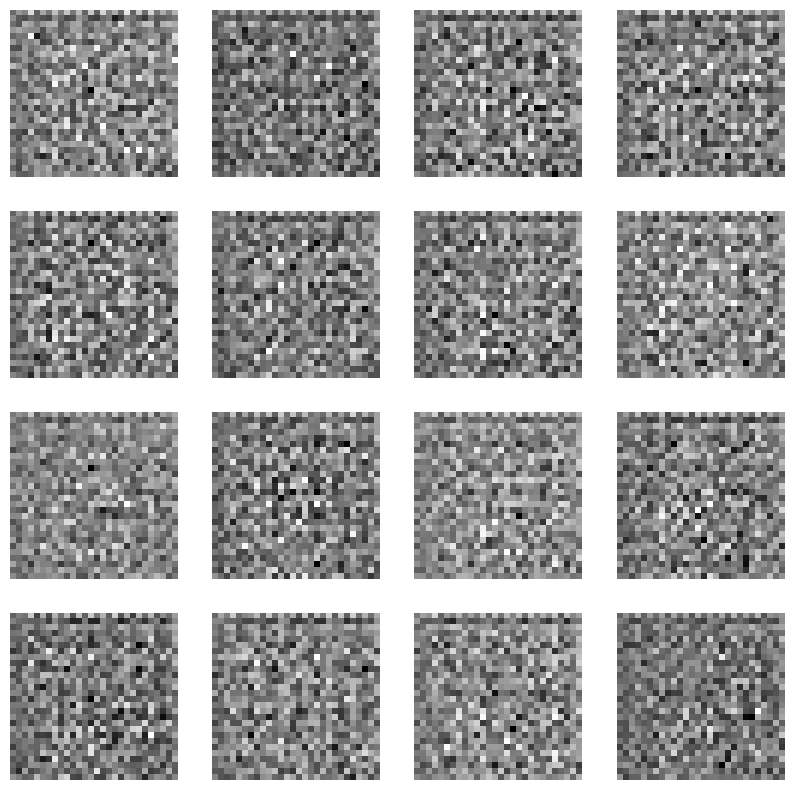

Epoch:  2


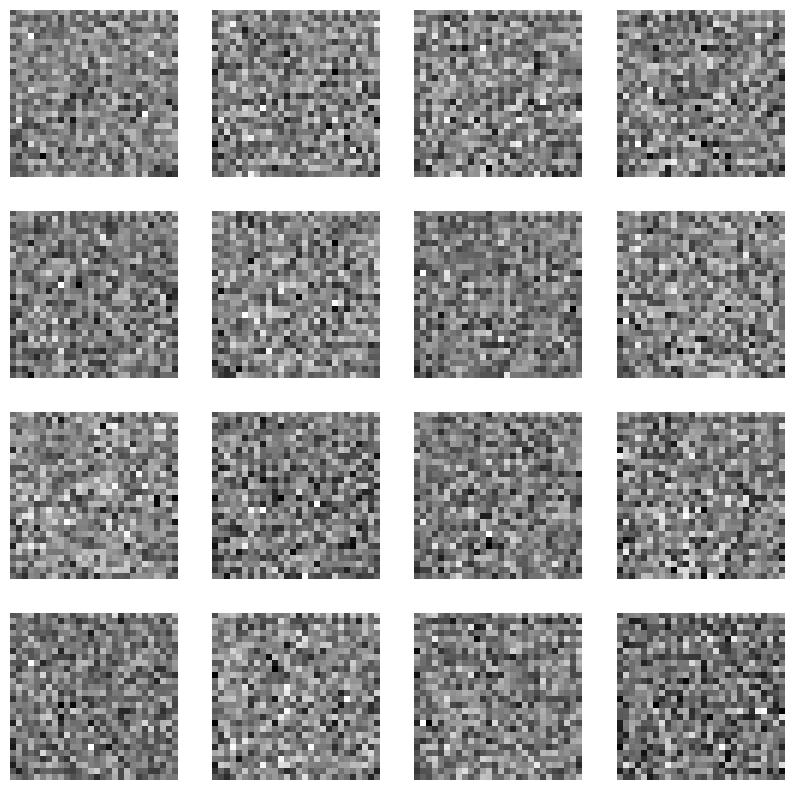

Epoch:  3


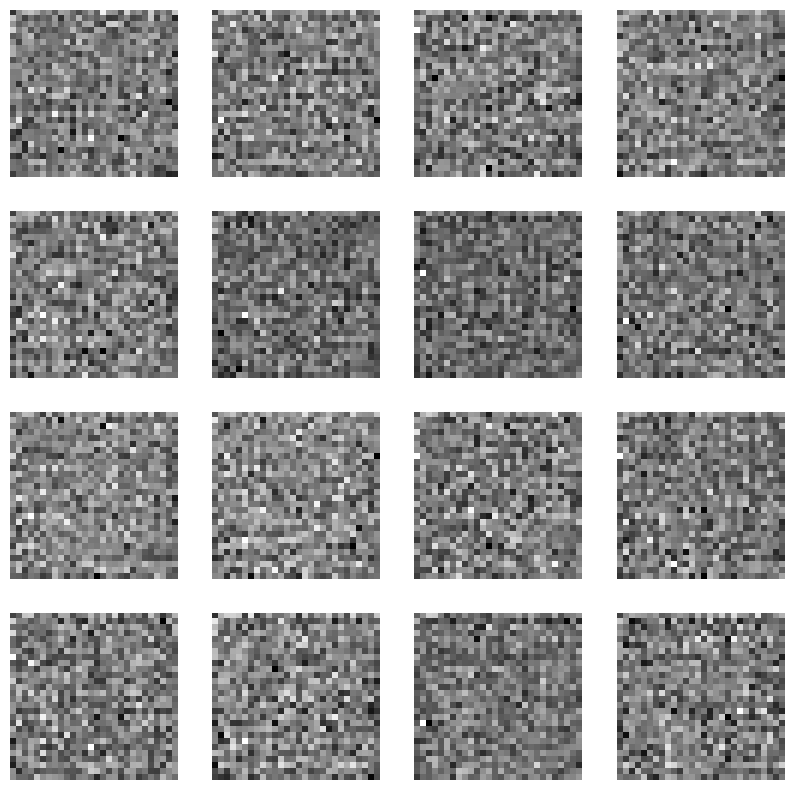

Epoch:  4


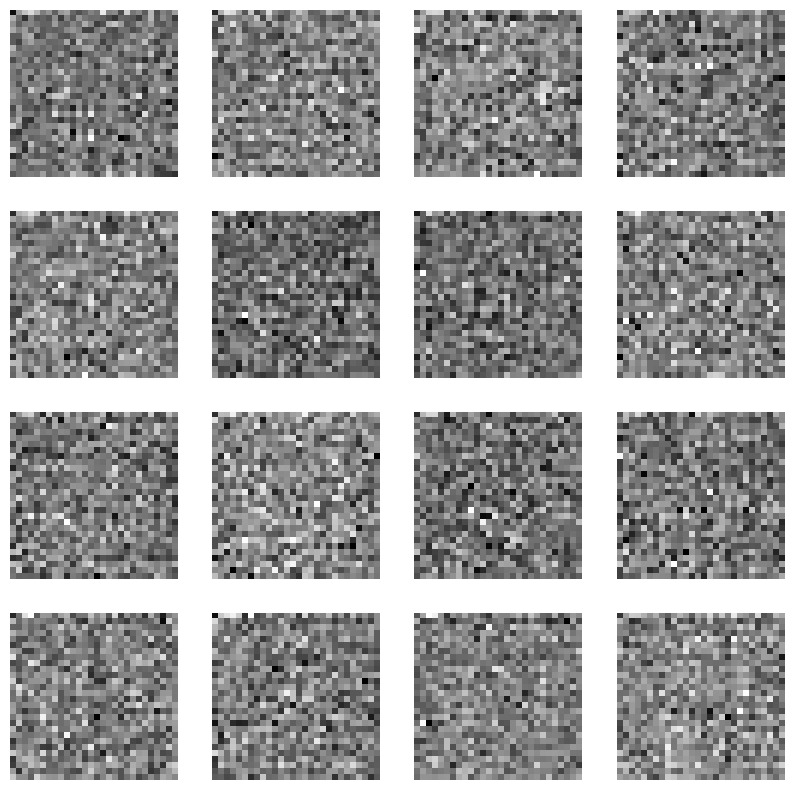

Epoch:  5


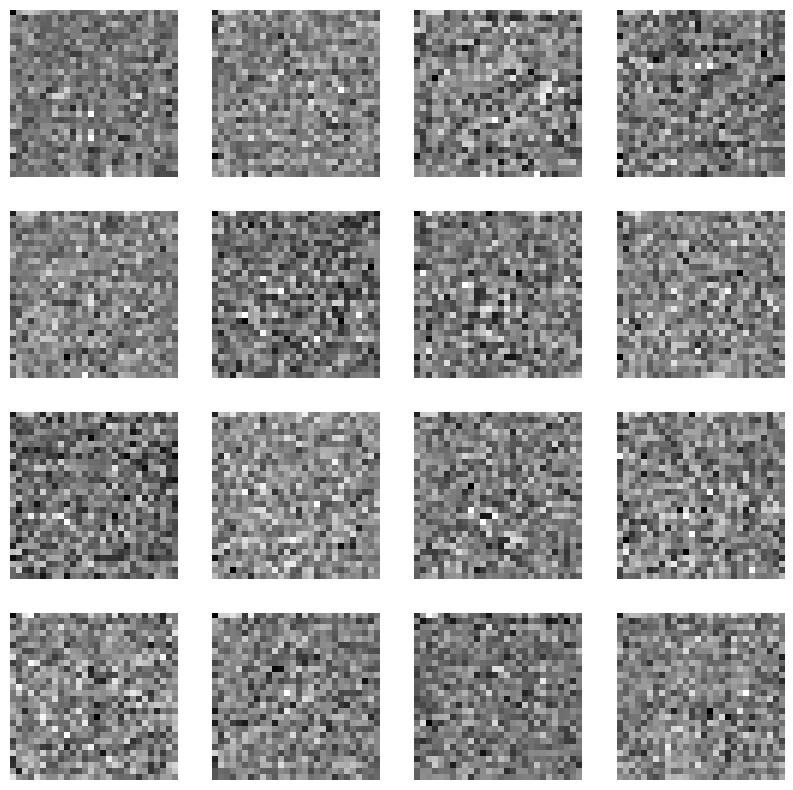

Epoch:  6


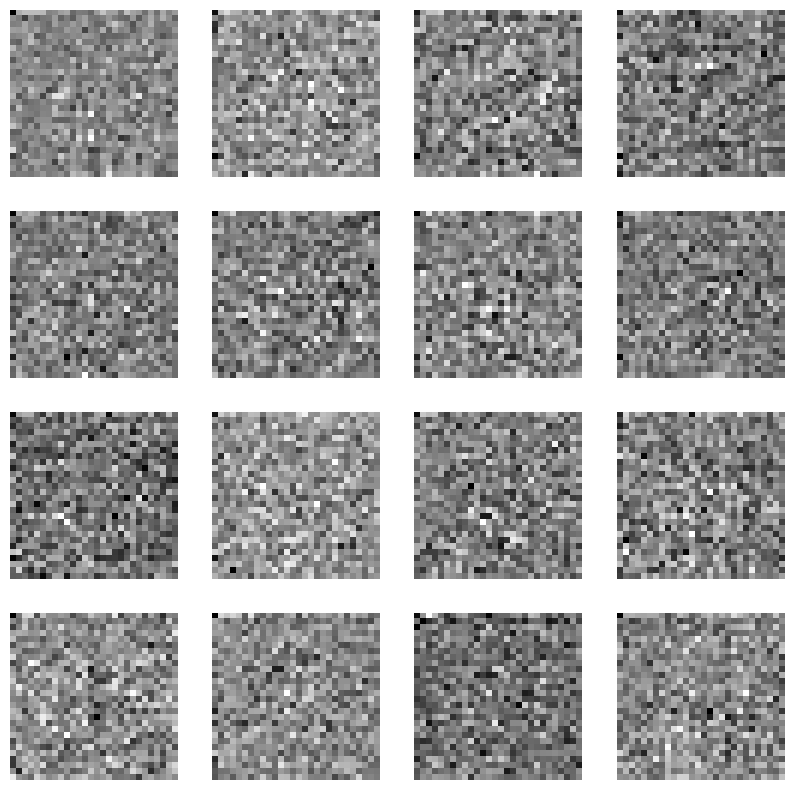

Epoch:  7


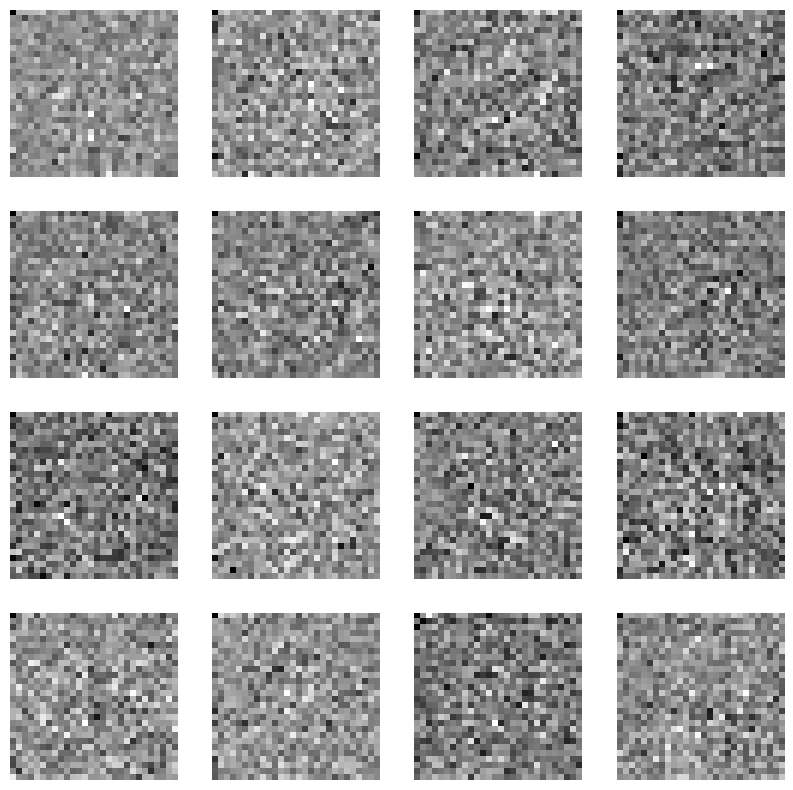

Epoch:  8


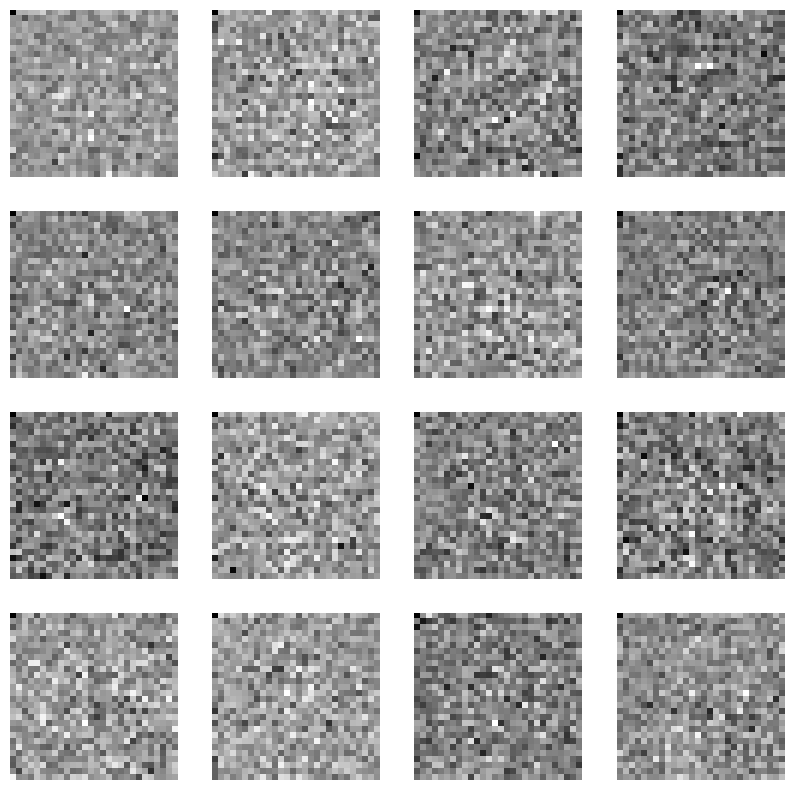

Epoch:  9


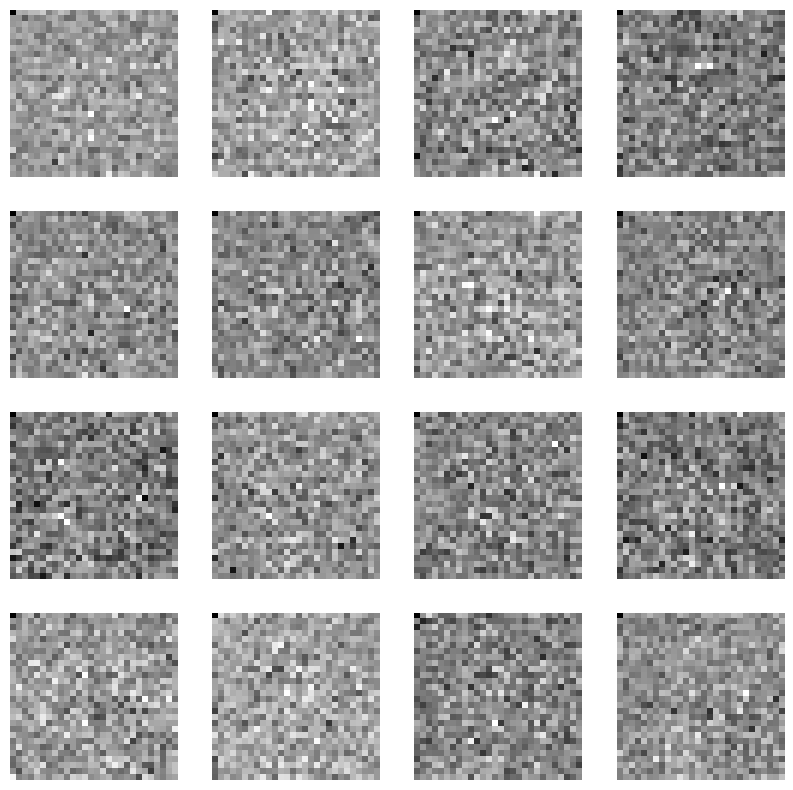

Epoch:  10


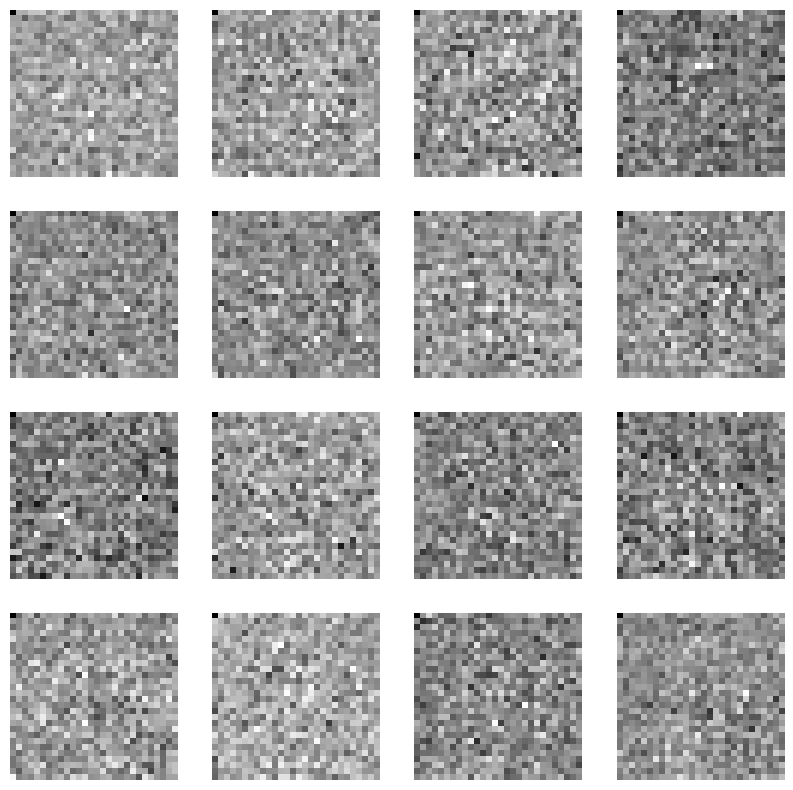

Epoch:  11


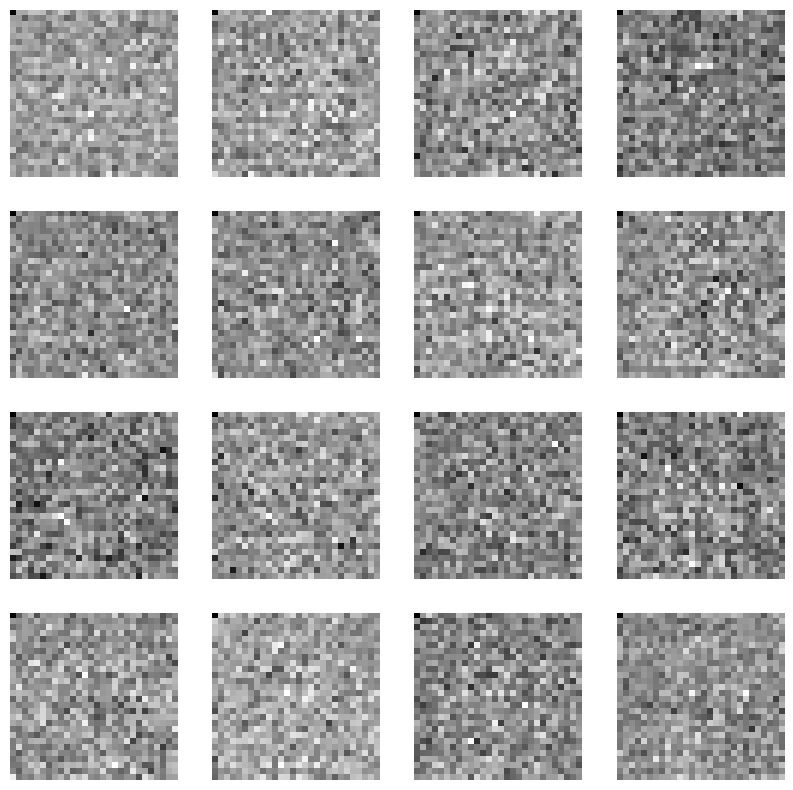

Epoch:  12


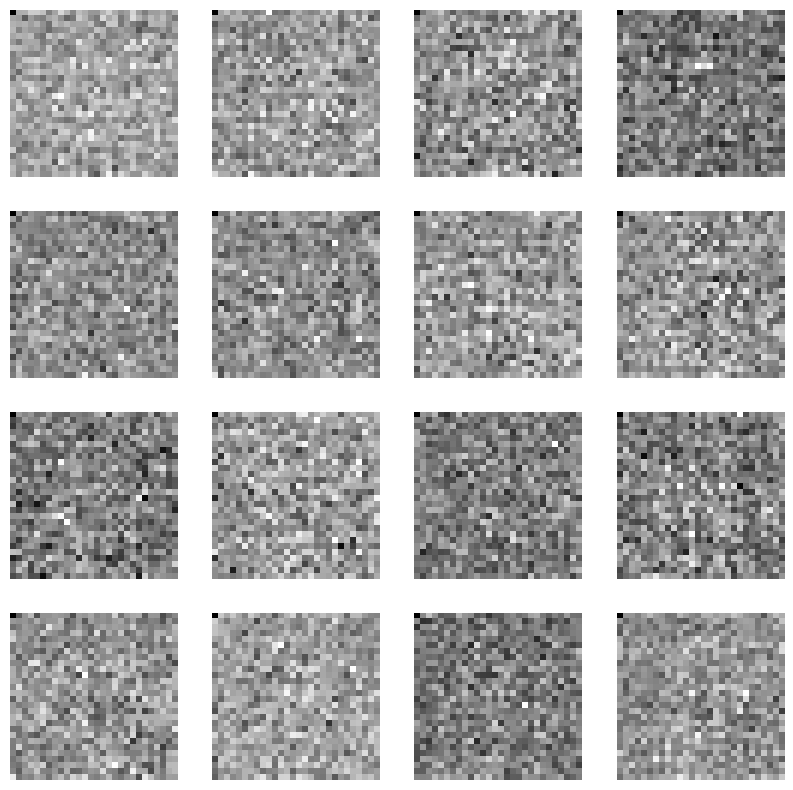

Epoch:  13


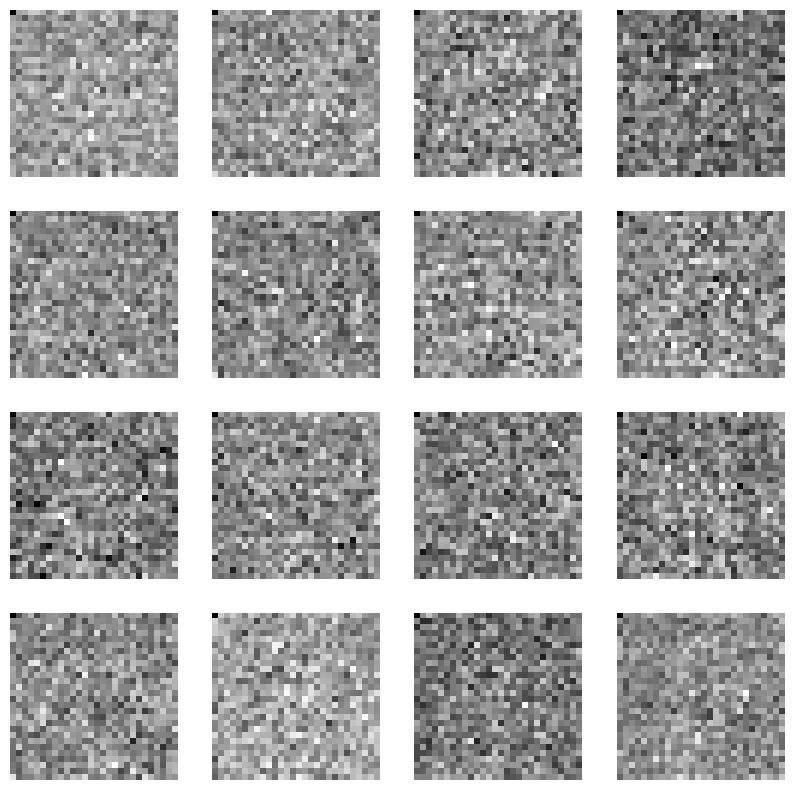

Epoch:  14


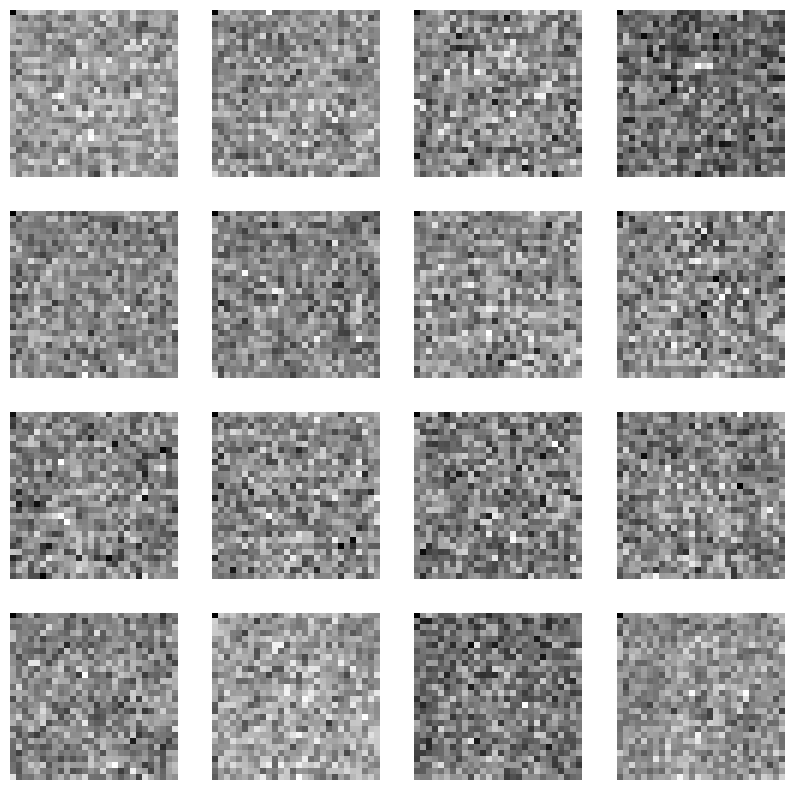

Epoch:  15


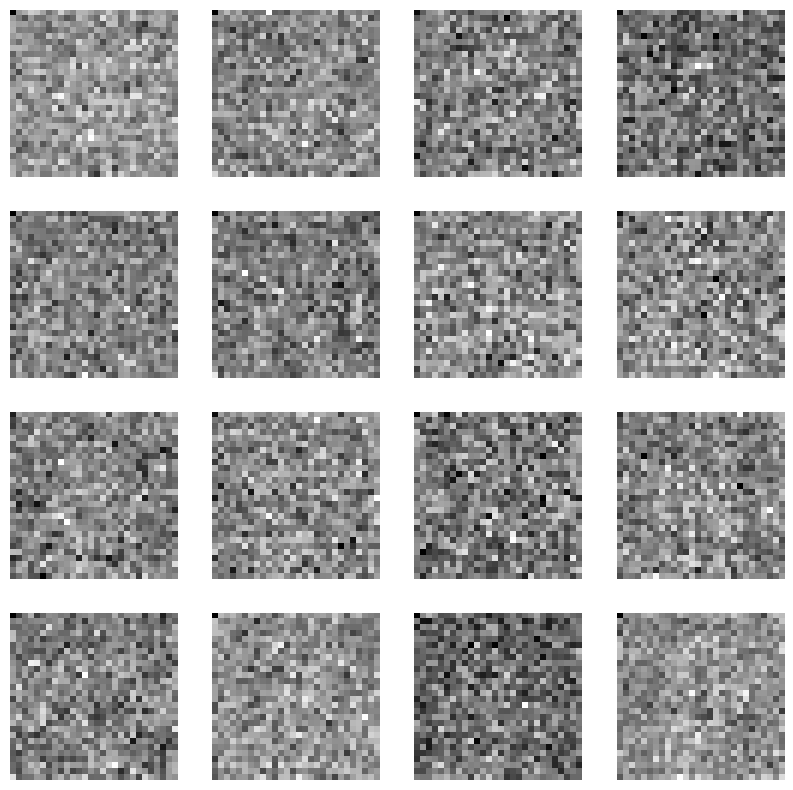

Epoch:  16


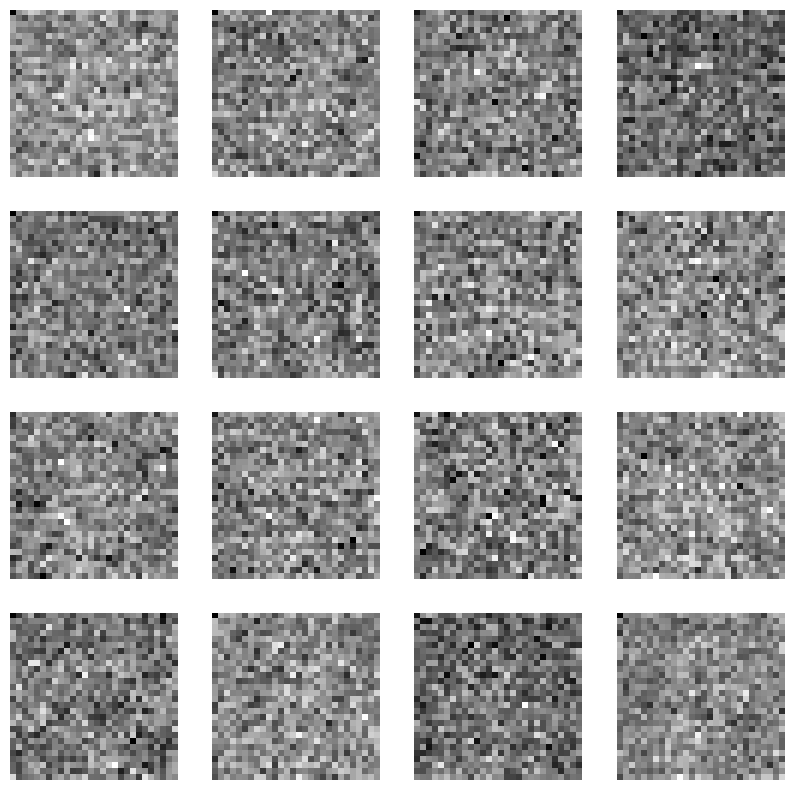

Epoch:  17


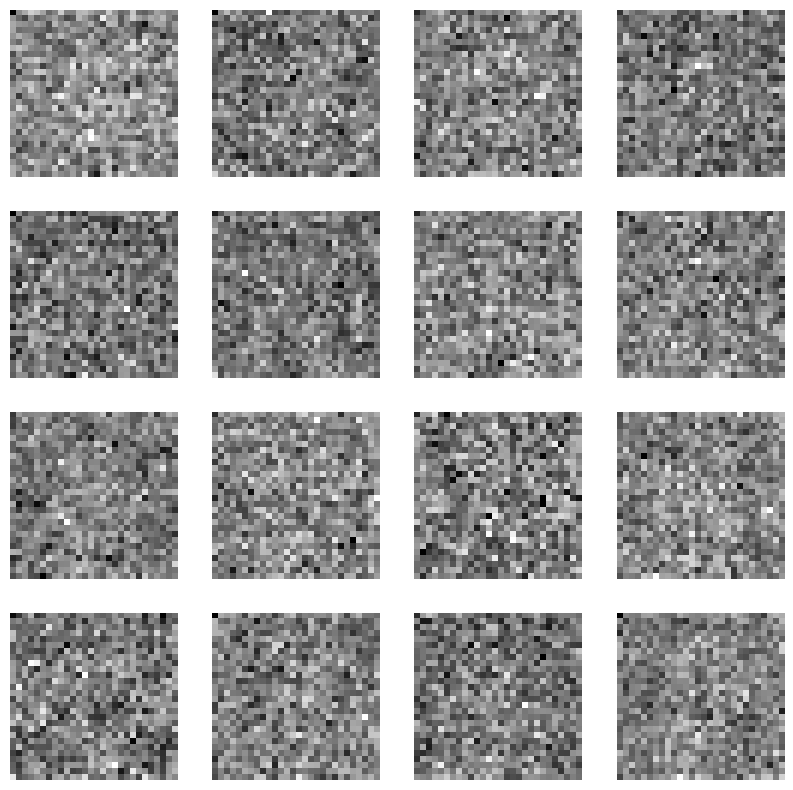

Epoch:  18


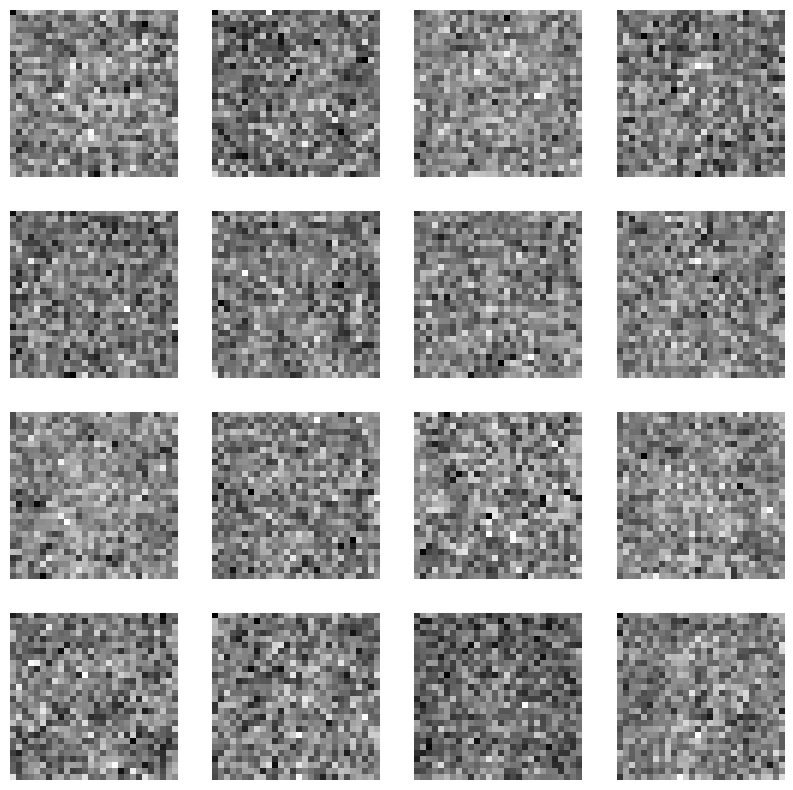

Epoch:  19


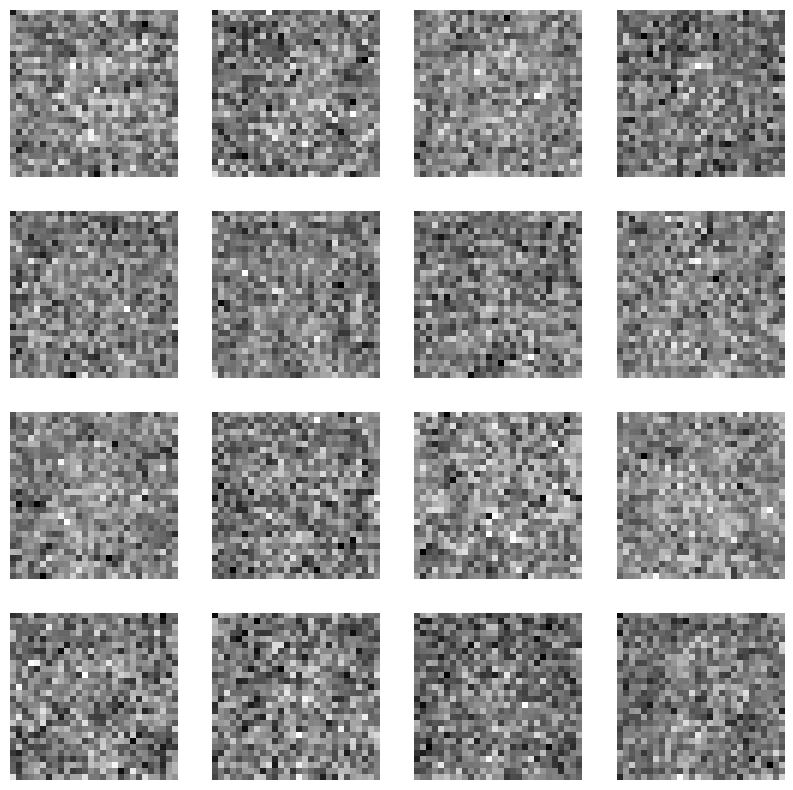

Epoch:  20


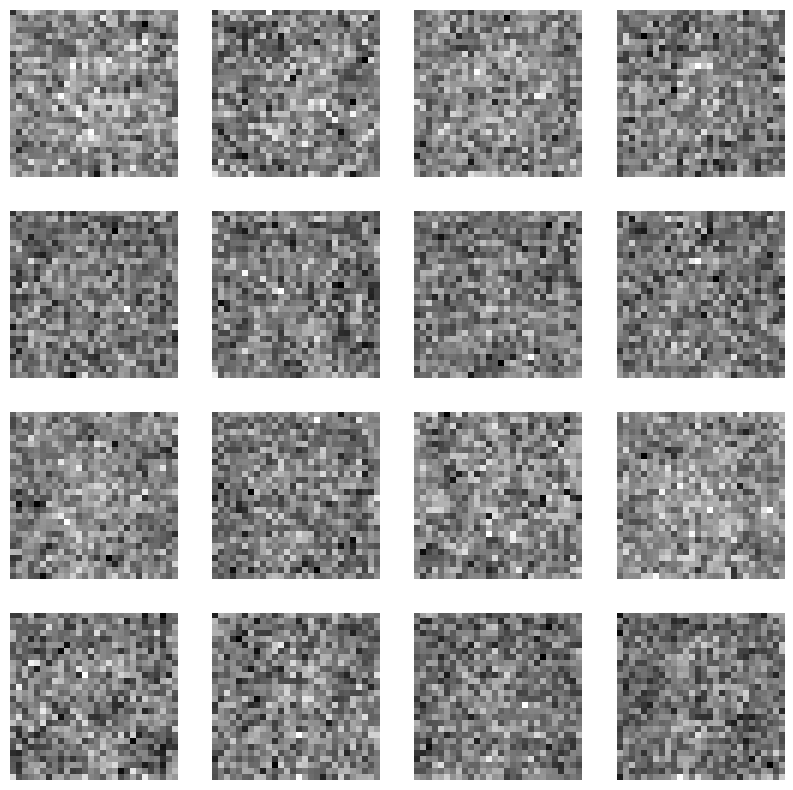

KeyboardInterrupt: 

In [51]:
train(X_train, epochs, test_images)